In [1]:
import LinearNet as nn
from LinearNet import DataLoader

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## 1) Load MNIST Dataset

In [2]:
mnist = datasets.load_digits()

In [3]:
X_mnist = mnist.data
y_mnist = mnist.target

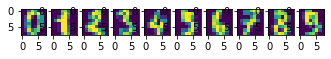

In [4]:
for i in range(1, 11):
  plt.subplot(1, 11, i)
  plt.imshow(X_mnist[i-1].reshape(8,8))
plt.show()

In [5]:
#apply one-hot encoding
oh_encoding = nn.OneHotEncoding()
y_mnist_categorical = oh_encoding(y_mnist)

y_mnist_categorical[0:10]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_mnist, y_mnist_categorical, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

mnist_training = DataLoader(X_train, y_train, batch_size=128)

(1437, 64) (360, 64) (1437, 10) (360, 10)


## 2) Neural Network

In [7]:
model = nn.NeuralNet()

#Linear[64, 128] -> Tanh -> Linear[128, 16] -> Tanh -> Linear[16, 16] -> SoftMax
model.Sequential(nn.Linear(64,128),
                 nn.Tanh(),
                 nn.Linear(128, 16),
                 nn.Tanh(),
                 nn.Linear(16, 10),
                 nn.SoftMax())

loss_fn = nn.CrossEntropyLoss()
gradient_descent = nn.StochasticGradientDescent(lr=0.001)
epochs = 250

In [8]:
model.hyperparameters

10554

In [9]:
model_out = model.train(mnist_training,
                        loss_fn,
                        gradient_descent,
                        epochs,
                        timed=False)

Epoch #25	Loss: 1503.306	Acc: 0.809	 
Epoch #50	Loss: 843.823	Acc: 0.903	 
Epoch #75	Loss: 596.402	Acc: 0.937	 
Epoch #100	Loss: 506.347	Acc: 0.945	 
Epoch #125	Loss: 441.987	Acc: 0.951	 
Epoch #150	Loss: 395.313	Acc: 0.955	 
Epoch #175	Loss: 375.576	Acc: 0.955	 
Epoch #200	Loss: 325.454	Acc: 0.96	 
Epoch #225	Loss: 306.555	Acc: 0.961	 
Epoch #250	Loss: 286.953	Acc: 0.965	 


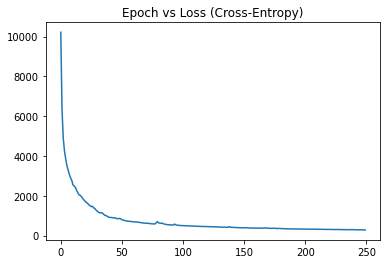

In [10]:
plt.plot(np.arange(0, len(model_out["loss_hist"])), model_out["loss_hist"])
plt.title("Epoch vs Loss (Cross-Entropy)")
plt.show()

In [11]:
preds = np.array([np.argmax(model(X_test[i])) for i in range(X_test.shape[0])])

In [12]:
preds

array([6, 9, 3, 7, 5, 2, 5, 3, 5, 9, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 1, 6, 8, 5, 3, 3, 4, 9, 8, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 3, 5, 6, 0, 9, 0, 0, 1, 3, 4, 5, 2, 4, 5,
       3, 0, 7, 5, 9, 9, 5, 6, 7, 0, 4, 5, 5, 9, 9, 0, 2, 7, 8, 0, 6, 4,
       4, 3, 1, 2, 1, 3, 5, 5, 9, 1, 5, 4, 4, 3, 5, 9, 1, 8, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 3, 7, 5, 7, 2, 6, 9, 4, 6, 7, 6, 7, 5, 8, 7, 3,
       7, 3, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 5, 8, 6, 6, 0,
       6, 4, 3, 9, 3, 1, 7, 2, 9, 0, 0, 5, 8, 6, 5, 7, 9, 8, 4, 5, 1, 8,
       7, 3, 2, 2, 3, 9, 8, 0, 3, 8, 3, 5, 6, 9, 9, 4, 1, 0, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 5, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 9, 2, 3, 6, 7, 1, 9, 1, 4, 4, 6, 5, 1, 5,
       5, 8, 6, 2, 8, 8, 3, 1, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 3, 7,
       7, 0, 1, 0, 4, 5, 8, 5, 3, 5, 0, 1, 1, 0, 0, 9, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 9, 3, 1, 0, 5, 8, 3, 4, 0, 8,

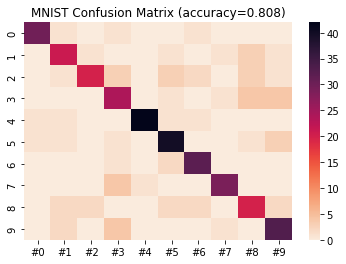

In [13]:
acc = np.mean(preds == np.argmax(y_test, axis=1)).round(3)
conf_mat = pd.DataFrame(confusion_matrix(np.apply_along_axis(np.argmax, 1, y_test), preds), columns=[f"#{name}" for _, name in enumerate(mnist.target_names)])
sns.heatmap(conf_mat, cmap='rocket_r')
plt.title(f"MNIST Confusion Matrix (accuracy={acc})")
plt.show()